#### Accuracy Score = 0.629
- columns = ['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)']
- train : test = 8 : 2  / random_state = 13
- max_depth = 4

#### Scaler 적용 여부 관계없이 score 값 일정

#### 주성분 분석 필요에 대해 고민 중

### 모듈 & 파일 Import

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('company3.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,추천
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,1.0
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,0.0
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,1.0
3,(주)헥토이노베이션,중소기업,3.0,140,0.0,120.00,100.00,83.33,3.3,1.0
4,(주)세종분석연구원,중소기업,3.0,3,6.0,33.33,0.00,0.00,3.0,1.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업명     174 non-null    object 
 1   기업구분    174 non-null    object 
 2   기업구분코드  174 non-null    float64
 3   사원수     174 non-null    int64  
 4   업력      174 non-null    float64
 5   입사율(%)  174 non-null    float64
 6   퇴사율(%)  174 non-null    float64
 7   이직율(%)  174 non-null    float64
 8   별점      174 non-null    float64
 9   추천      174 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 13.7+ KB


### Decision Tree (1)

- 훈련 데이터, 검증 데이터 구분 없이 진행
- max_depth가 높아질수록 accuracy_score 상승

In [5]:
X = df[['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)']]
y = df['추천']

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X, y)

    pred = dt.predict(X)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y, pred).round(3)}')

max_depth: 2 - accuracy_score: 0.644
max_depth: 3 - accuracy_score: 0.707
max_depth: 4 - accuracy_score: 0.77
max_depth: 5 - accuracy_score: 0.828
max_depth: 6 - accuracy_score: 0.874
max_depth: 7 - accuracy_score: 0.931
max_depth: 8 - accuracy_score: 0.96
max_depth: 9 - accuracy_score: 0.989


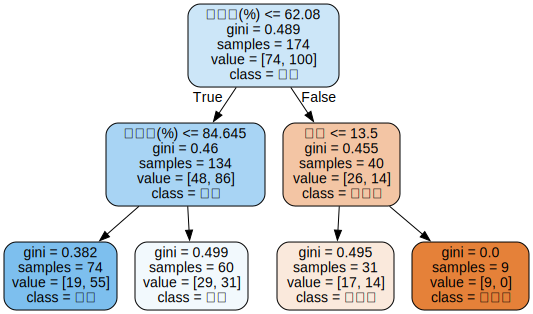

In [23]:
from graphviz import Source
from sklearn.tree import export_graphviz

dt = DecisionTreeClassifier(max_depth = 2, random_state = 13)
dt.fit(X, y)

Source(export_graphviz(dt, 
                    feature_names=['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)'],
                    class_names=['비추천', '추천'],
                    rounded=True, filled=True))

### Decision Tree (2)
- 훈련 데이터, 검증 데이터 구분 후 진행
- accuracy_score 최대치인 max_depth = 7

In [50]:
from sklearn.model_selection import train_test_split

X = df[['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X_train, y_train)

    pred = dt.predict(X_test)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y_test, pred).round(3)}')

# 추천 column을 별점으로 만들었는데, 별점을 X 데이터에 넣으면, 당연히 정확도 1이 나온다.

max_depth: 2 - accuracy_score: 0.429
max_depth: 3 - accuracy_score: 0.486
max_depth: 4 - accuracy_score: 0.514
max_depth: 5 - accuracy_score: 0.429
max_depth: 6 - accuracy_score: 0.457
max_depth: 7 - accuracy_score: 0.629
max_depth: 8 - accuracy_score: 0.571
max_depth: 9 - accuracy_score: 0.571


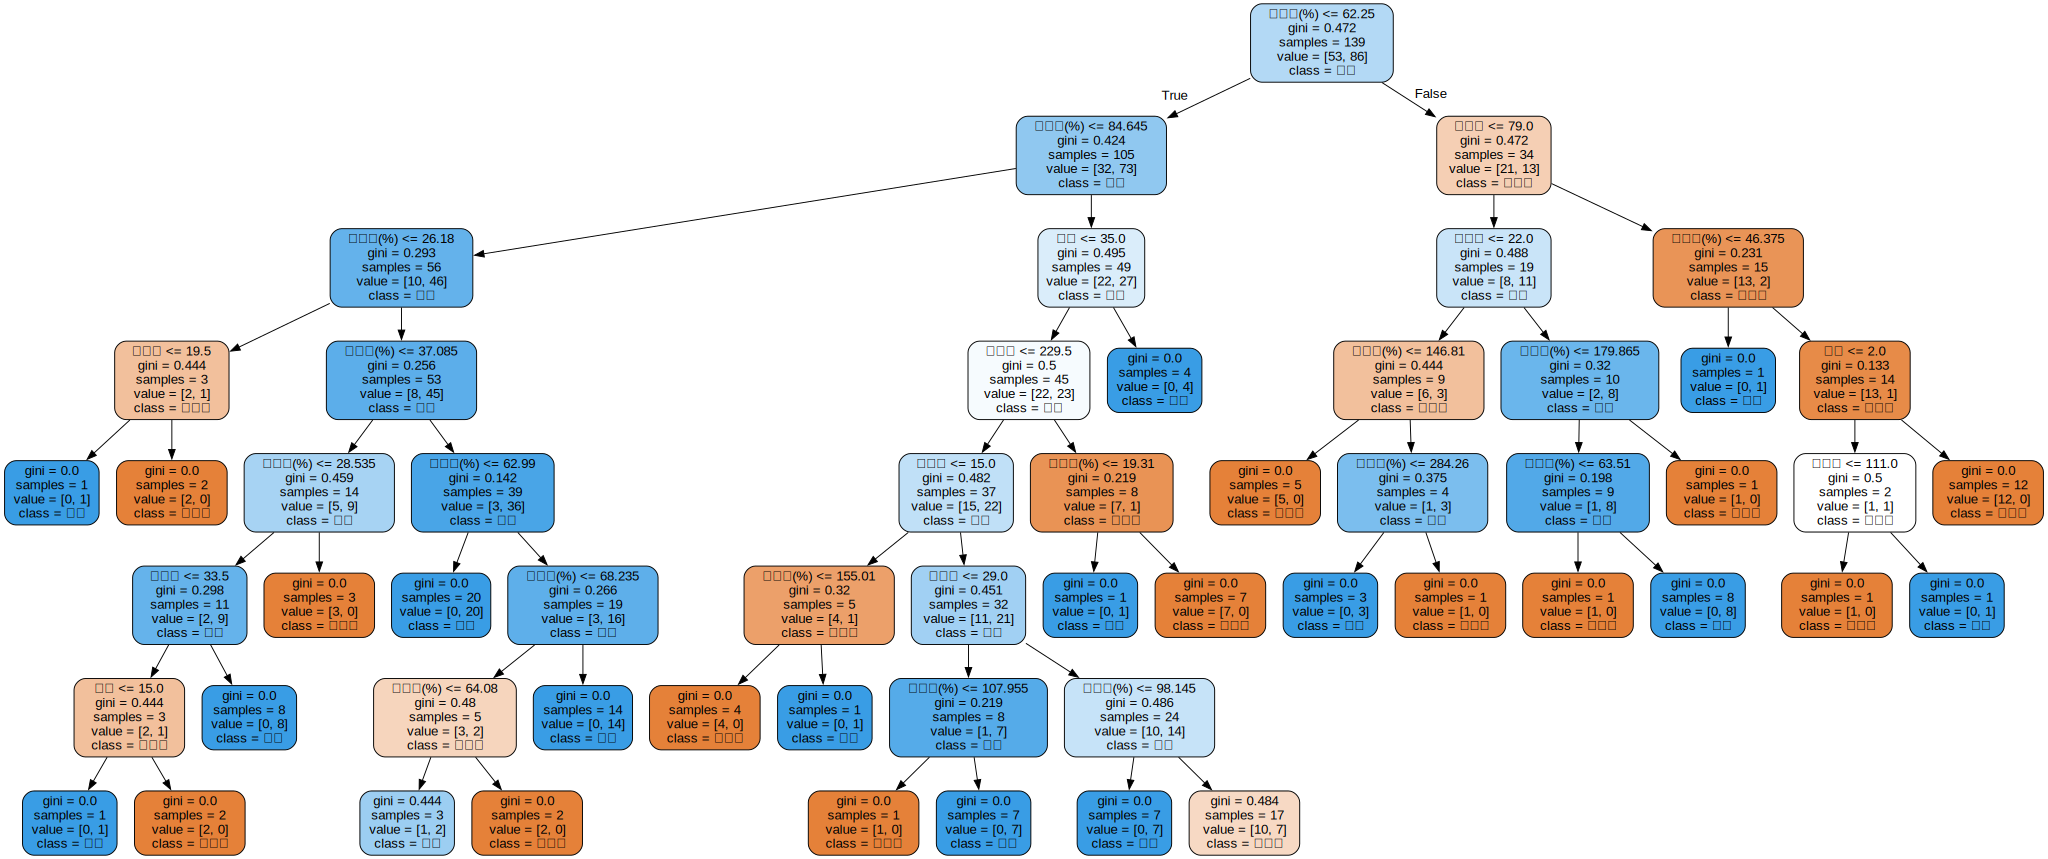

In [52]:
from graphviz import Source
from sklearn.tree import export_graphviz

dt = DecisionTreeClassifier(max_depth = 7, random_state = 13)
dt.fit(X_train, y_train)

Source(export_graphviz(dt, 
                    feature_names=['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)'],
                    class_names=['비추천', '추천'],
                    rounded=True, filled=True))

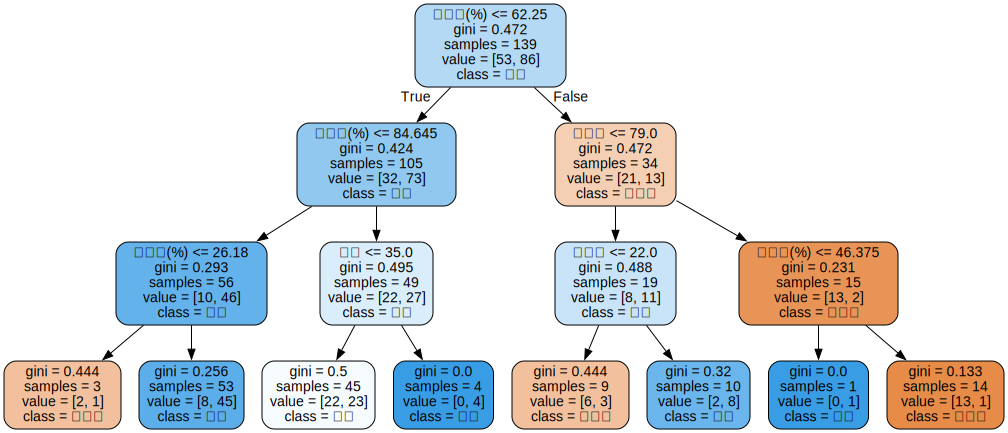

In [21]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 13)
dt.fit(X_train, y_train)

Source(export_graphviz(dt, 
                    feature_names=['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)'],
                    class_names=['비추천', '추천'],
                    rounded=True, filled=True))


### Decision Tree (3)
- Feature를 다르게 설정해 분류 진행

In [64]:
X = df[['기업구분코드']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X_train, y_train)

    pred = dt.predict(X_test)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y_test, pred).round(3)}')

max_depth: 2 - accuracy_score: 0.4
max_depth: 3 - accuracy_score: 0.4
max_depth: 4 - accuracy_score: 0.4
max_depth: 5 - accuracy_score: 0.4
max_depth: 6 - accuracy_score: 0.4
max_depth: 7 - accuracy_score: 0.4
max_depth: 8 - accuracy_score: 0.4
max_depth: 9 - accuracy_score: 0.4


In [60]:
X = df[['사원수']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X_train, y_train)

    pred = dt.predict(X_test)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y_test, pred).round(3)}')

max_depth: 2 - accuracy_score: 0.4
max_depth: 3 - accuracy_score: 0.4
max_depth: 4 - accuracy_score: 0.429
max_depth: 5 - accuracy_score: 0.429
max_depth: 6 - accuracy_score: 0.429
max_depth: 7 - accuracy_score: 0.429
max_depth: 8 - accuracy_score: 0.486
max_depth: 9 - accuracy_score: 0.486


In [61]:
X = df[['업력']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X_train, y_train)

    pred = dt.predict(X_test)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y_test, pred).round(3)}')

max_depth: 2 - accuracy_score: 0.4
max_depth: 3 - accuracy_score: 0.4
max_depth: 4 - accuracy_score: 0.457
max_depth: 5 - accuracy_score: 0.457
max_depth: 6 - accuracy_score: 0.429
max_depth: 7 - accuracy_score: 0.343
max_depth: 8 - accuracy_score: 0.429
max_depth: 9 - accuracy_score: 0.429


In [71]:
X = df[['이직율(%)']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X_train, y_train)

    pred = dt.predict(X_test)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y_test, pred).round(3)}')

max_depth: 2 - accuracy_score: 0.457
max_depth: 3 - accuracy_score: 0.457
max_depth: 4 - accuracy_score: 0.571
max_depth: 5 - accuracy_score: 0.571
max_depth: 6 - accuracy_score: 0.543
max_depth: 7 - accuracy_score: 0.514
max_depth: 8 - accuracy_score: 0.543
max_depth: 9 - accuracy_score: 0.514


In [70]:
X = df[['입사율(%)', '퇴사율(%)']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X_train, y_train)

    pred = dt.predict(X_test)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y_test, pred).round(3)}')

max_depth: 2 - accuracy_score: 0.486
max_depth: 3 - accuracy_score: 0.429
max_depth: 4 - accuracy_score: 0.429
max_depth: 5 - accuracy_score: 0.457
max_depth: 6 - accuracy_score: 0.486
max_depth: 7 - accuracy_score: 0.514
max_depth: 8 - accuracy_score: 0.457
max_depth: 9 - accuracy_score: 0.429


In [65]:
X = df[['기업구분코드', '사원수', '업력', '이직율(%)']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X_train, y_train)

    pred = dt.predict(X_test)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y_test, pred).round(3)}')

max_depth: 2 - accuracy_score: 0.4
max_depth: 3 - accuracy_score: 0.429
max_depth: 4 - accuracy_score: 0.429
max_depth: 5 - accuracy_score: 0.429
max_depth: 6 - accuracy_score: 0.429
max_depth: 7 - accuracy_score: 0.429
max_depth: 8 - accuracy_score: 0.486
max_depth: 9 - accuracy_score: 0.457


In [67]:
X = df[['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X_train, y_train)

    pred = dt.predict(X_test)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y_test, pred).round(3)}')

max_depth: 2 - accuracy_score: 0.429
max_depth: 3 - accuracy_score: 0.486
max_depth: 4 - accuracy_score: 0.629
max_depth: 5 - accuracy_score: 0.6
max_depth: 6 - accuracy_score: 0.6
max_depth: 7 - accuracy_score: 0.629
max_depth: 8 - accuracy_score: 0.571
max_depth: 9 - accuracy_score: 0.6


In [68]:
X = df[['기업구분코드', '사원수', '업력', '입사율(%)']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X_train, y_train)

    pred = dt.predict(X_test)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y_test, pred).round(3)}')

max_depth: 2 - accuracy_score: 0.4
max_depth: 3 - accuracy_score: 0.4
max_depth: 4 - accuracy_score: 0.457
max_depth: 5 - accuracy_score: 0.571
max_depth: 6 - accuracy_score: 0.371
max_depth: 7 - accuracy_score: 0.457
max_depth: 8 - accuracy_score: 0.371
max_depth: 9 - accuracy_score: 0.371


In [69]:
X = df[['기업구분코드', '사원수', '업력', '퇴사율(%)']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X_train, y_train)

    pred = dt.predict(X_test)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y_test, pred).round(3)}')

max_depth: 2 - accuracy_score: 0.429
max_depth: 3 - accuracy_score: 0.514
max_depth: 4 - accuracy_score: 0.429
max_depth: 5 - accuracy_score: 0.371
max_depth: 6 - accuracy_score: 0.457
max_depth: 7 - accuracy_score: 0.486
max_depth: 8 - accuracy_score: 0.429
max_depth: 9 - accuracy_score: 0.514


### Scaler 사용 -> Decision Tree

- minmax, standard scaler가 이상치에 민감하기 때문에 robust scaler를 사용
- minmax, standard scaler 결과와 비교하기
- https://wooono.tistory.com/96 참고

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
rc("font", family = font_manager.FontProperties(fname="C:/Windows/Fonts/KoPubWorld Dotum_Pro Medium.otf").get_name())

get_ipython().run_line_magic('matplotlib', 'inline')

#### Scaler 사용 전 각 feature 분포

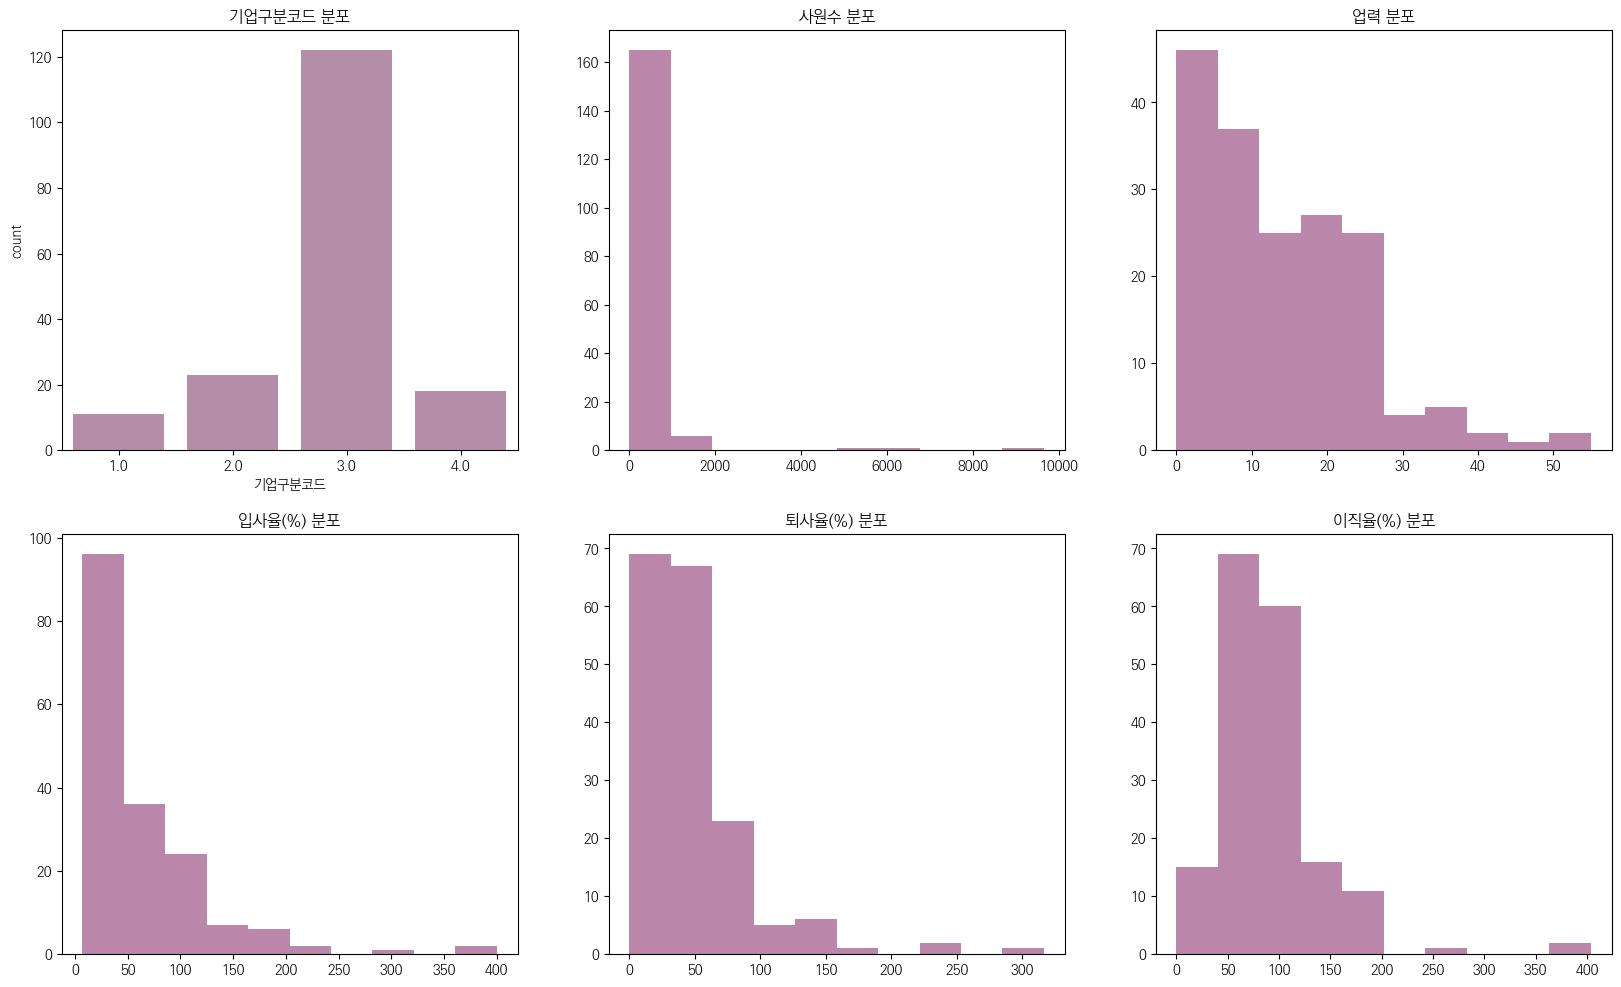

In [113]:
plt.figure(figsize=(20,12))

plt.subplot(231)
sns.countplot(data=df, x='기업구분코드', color='#ba87ab')
plt.title('기업구분코드 분포')

for idx, col in enumerate(X.columns[1:]):
    plt.subplot(int(f'23{idx+2}'))
    plt.hist(data=df, x=col, color='#ba87ab')
    plt.title(f'{col} 분포')

plt.show()

#### Scaler 사용 후 각 Feature 분포

In [120]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

X = df[['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

RS = RobustScaler()

X_rs = RS.fit_transform(X_train)
X_rs_pd = pd.DataFrame(X_rs, columns= X.columns)
X_rs_pd.head()

,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%)
0,0.0,-0.043243,0.5000,-0.154196,-0.003769,0.724084
1,0.0,-0.275676,-0.5000,0.718065,0.369902,-0.384979
2,0.0,0.335135,0.2500,1.003728,0.695921,-0.338880
3,0.0,-0.059459,0.5625,0.004364,0.151568,0.508208
4,0.0,-0.205405,-0.7500,0.452405,0.681653,0.311221


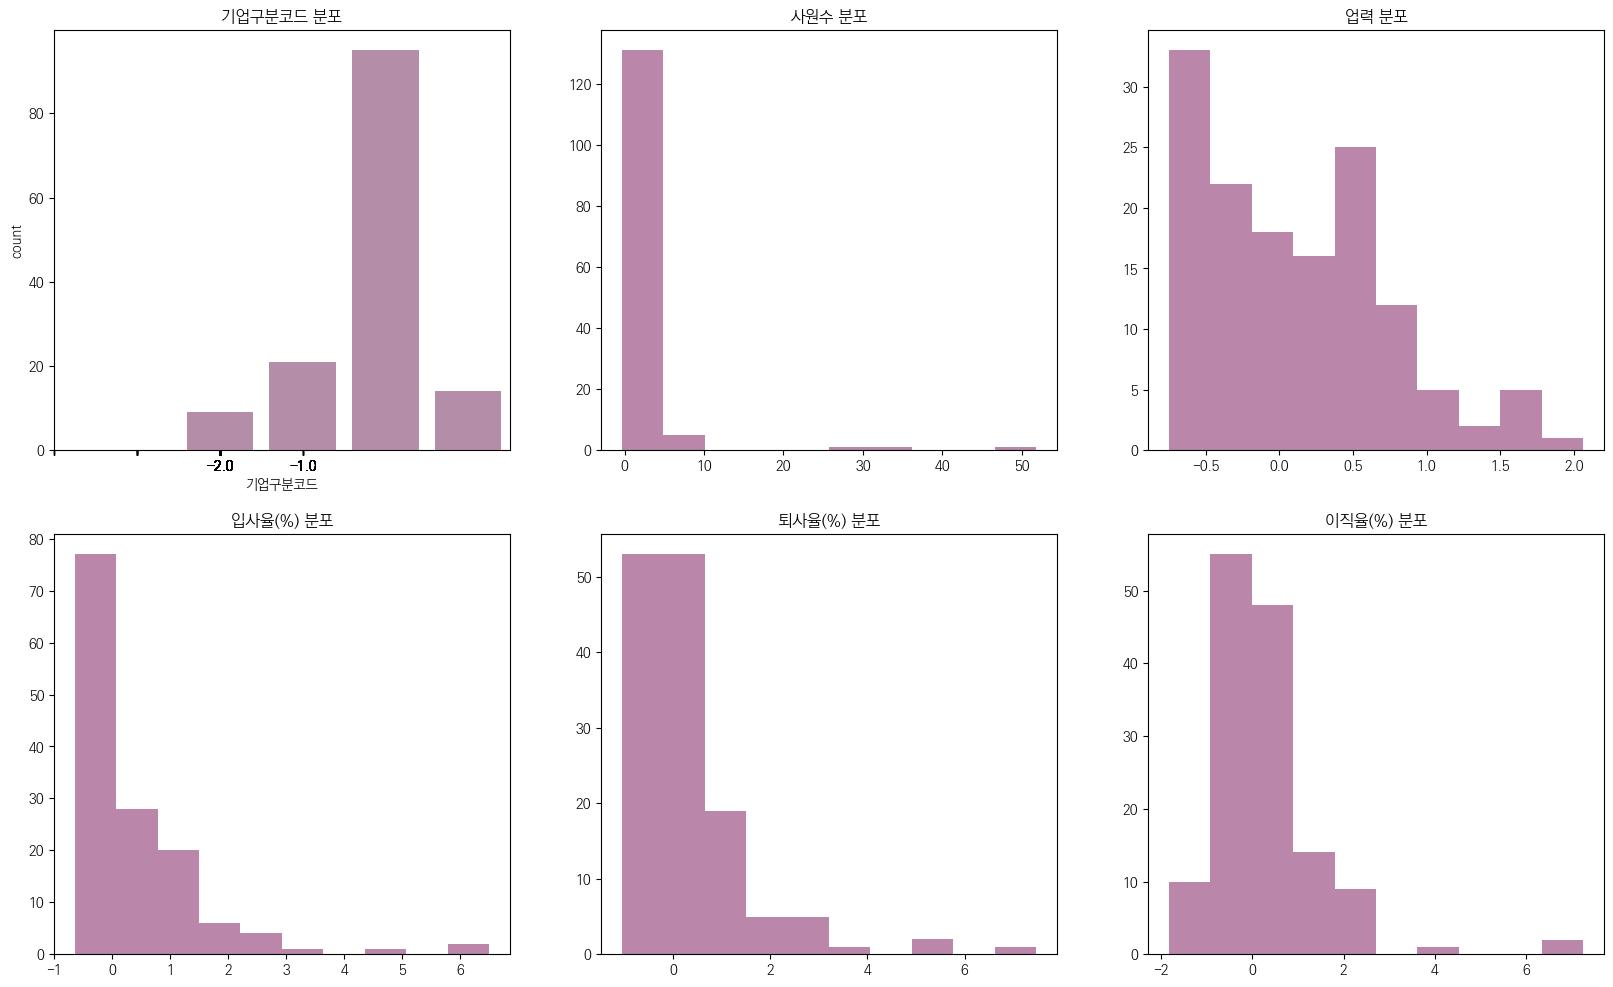

In [131]:
plt.figure(figsize=(20,12))

plt.subplot(231)
sns.countplot(data=X_rs_pd, x='기업구분코드', color='#ba87ab')
plt.title('기업구분코드 분포')
plt.xticks(round(X_rs_pd['기업구분코드'],2))

for idx, col in enumerate(X.columns[1:]):
    plt.subplot(int(f'23{idx+2}'))
    plt.hist(data=X_rs_pd, x=col, color='#ba87ab')
    plt.title(f'{col} 분포')

plt.show()

#### Scaler 활용 후 accuracy_score 검사
- scaler를 돌리기 전과 큰 차이 없음 확인

In [126]:
X = df[['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

RS = RobustScaler()

X_train_rs = RS.fit_transform(X_train)
X_test_rs = RS.transform(X_test)

In [128]:
X = df[['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

RS = RobustScaler()

X_train_rs = RS.fit_transform(X_train)
X_test_rs = RS.transform(X_test)

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X_train_rs, y_train)

    pred = dt.predict(X_test_rs)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y_test, pred).round(3)}')

max_depth: 2 - accuracy_score: 0.429
max_depth: 3 - accuracy_score: 0.486
max_depth: 4 - accuracy_score: 0.514
max_depth: 5 - accuracy_score: 0.429
max_depth: 6 - accuracy_score: 0.457
max_depth: 7 - accuracy_score: 0.629
max_depth: 8 - accuracy_score: 0.571
max_depth: 9 - accuracy_score: 0.571


In [132]:
X = df[['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

SS = StandardScaler()

X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X_train_ss, y_train)

    pred = dt.predict(X_test_ss)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y_test, pred).round(3)}')

max_depth: 2 - accuracy_score: 0.429
max_depth: 3 - accuracy_score: 0.486
max_depth: 4 - accuracy_score: 0.514
max_depth: 5 - accuracy_score: 0.429
max_depth: 6 - accuracy_score: 0.457
max_depth: 7 - accuracy_score: 0.629
max_depth: 8 - accuracy_score: 0.571
max_depth: 9 - accuracy_score: 0.571


In [133]:
X = df[['기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)']]
y = df['추천']

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size = 0.2, random_state = 13)

MMS = MinMaxScaler()

X_train_mms = MMS.fit_transform(X_train_ss)
X_test_mms = MMS.transform(X_test_ss)

for i in range(2,10):
    dt = DecisionTreeClassifier(max_depth = i, random_state = 13)
    dt.fit(X_train_mms, y_train)

    pred = dt.predict(X_test_mms)
    print(f'max_depth: {i} - accuracy_score: {accuracy_score(y_test, pred).round(3)}')

max_depth: 2 - accuracy_score: 0.429
max_depth: 3 - accuracy_score: 0.486
max_depth: 4 - accuracy_score: 0.514
max_depth: 5 - accuracy_score: 0.429
max_depth: 6 - accuracy_score: 0.457
max_depth: 7 - accuracy_score: 0.629
max_depth: 8 - accuracy_score: 0.571
max_depth: 9 - accuracy_score: 0.571


### 주성분분석 (PCA) (진행 중)